<a href="https://colab.research.google.com/github/AriannaGiannoni/MyByros_Challenge/blob/main/Copia_di_Untitled4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import json
from PIL import Image, ImageDraw

# Caricare il file JSON
json_file_path = '/content/drive/MyDrive/dataset/receipt_challenge_response.json'
with open(json_file_path, 'r') as f:
    data = json.load(f)

# Caricare l'immagine
image_path = '/content/drive/MyDrive/dataset/receipt_challenge_image.jpg'
image = Image.open(image_path)
draw = ImageDraw.Draw(image)

# Esplora tutte le chiavi principali nel JSON
print("Chiavi principali nel JSON:", data.keys())

# Esplora la struttura delle pagine
pages = data.get('Pages', [])
print(f"Numero di pagine: {len(pages)}")

# Se ci sono pagine, esplora la struttura di ognuna
if pages:
    first_page = pages[0]
    print("Struttura della prima pagina:", first_page.keys())

    # Esplora la chiave Ocr come lista
    ocr_data = first_page.get('Ocr', [])
    print("Numero di elementi in 'Ocr':", len(ocr_data))
    if ocr_data:
        # Mostra il primo elemento in Ocr
        print("Esempio di annotazione OCR:", ocr_data[0])

    # Esplorare la chiave Entities come dizionario
    entities_data = first_page.get('Entities', {})
    print("Numero di entità:", len(entities_data))
    for entity_name, entity_info in entities_data.items():
        print(f"Entità: {entity_name}")
        print(f"Testo: {entity_info.get('Text')}")
        print(f"Confidenza: {entity_info.get('Confidence')}")

        # Disegna bounding box
        bounding_boxes = entity_info.get('BoundingBox', [])
        for box in bounding_boxes:
            if len(box) == 4:
                coords = [(point[0], point[1]) for point in box]
                draw.polygon(coords, outline='red', fill=(255, 0, 0, 50))
                draw.text((coords[0][0], coords[0][1] - 10), entity_info.get('Text', ''), fill='red')

# Salva l'immagine risultante
image.save('output_with_entities.png')

# Mostra l'immagine risultante
image.show()

Chiavi principali nel JSON: dict_keys(['Pages'])
Numero di pagine: 1
Struttura della prima pagina: dict_keys(['Entities', 'Ocr', 'PageLayout', 'PageId'])
Numero di elementi in 'Ocr': 99
Esempio di annotazione OCR: {'Text': 'HSB', 'Confidence': 99.6, 'BoundingBox': [[241, 161], [278, 161], [278, 188], [241, 188]]}
Numero di entità: 14
Entità: Address
Testo: S.S. 93 KM 56 300
Confidenza: 99.39
Entità: Currency
Testo: EUR
Confidenza: 99.1
Entità: IssueDate
Testo: 19/11/2022
Confidenza: 99.4
Entità: PhoneNumber
Testo: 0972. 816011
Confidenza: 99.1
Entità: PostalCode
Testo: 85024
Confidenza: 99.5
Entità: Residence
Testo: LAVELLO (PZ)
Confidenza: 99.1
Entità: TermsOfPayment
Testo: Contanti
Confidenza: 99.3
Entità: Time
Testo: 20:59:00
Confidenza: 99.4
Entità: Total
Testo: 77.50
Confidenza: 98.2
Entità: TotalCardPayment
Testo: None
Confidenza: None
Entità: TotalCashPayment
Testo: 77.50
Confidenza: 70.1
Entità: FiscalCode
Testo: 10240960962
Confidenza: 99.4
Entità: VendorName
Testo: HSB SAN BA

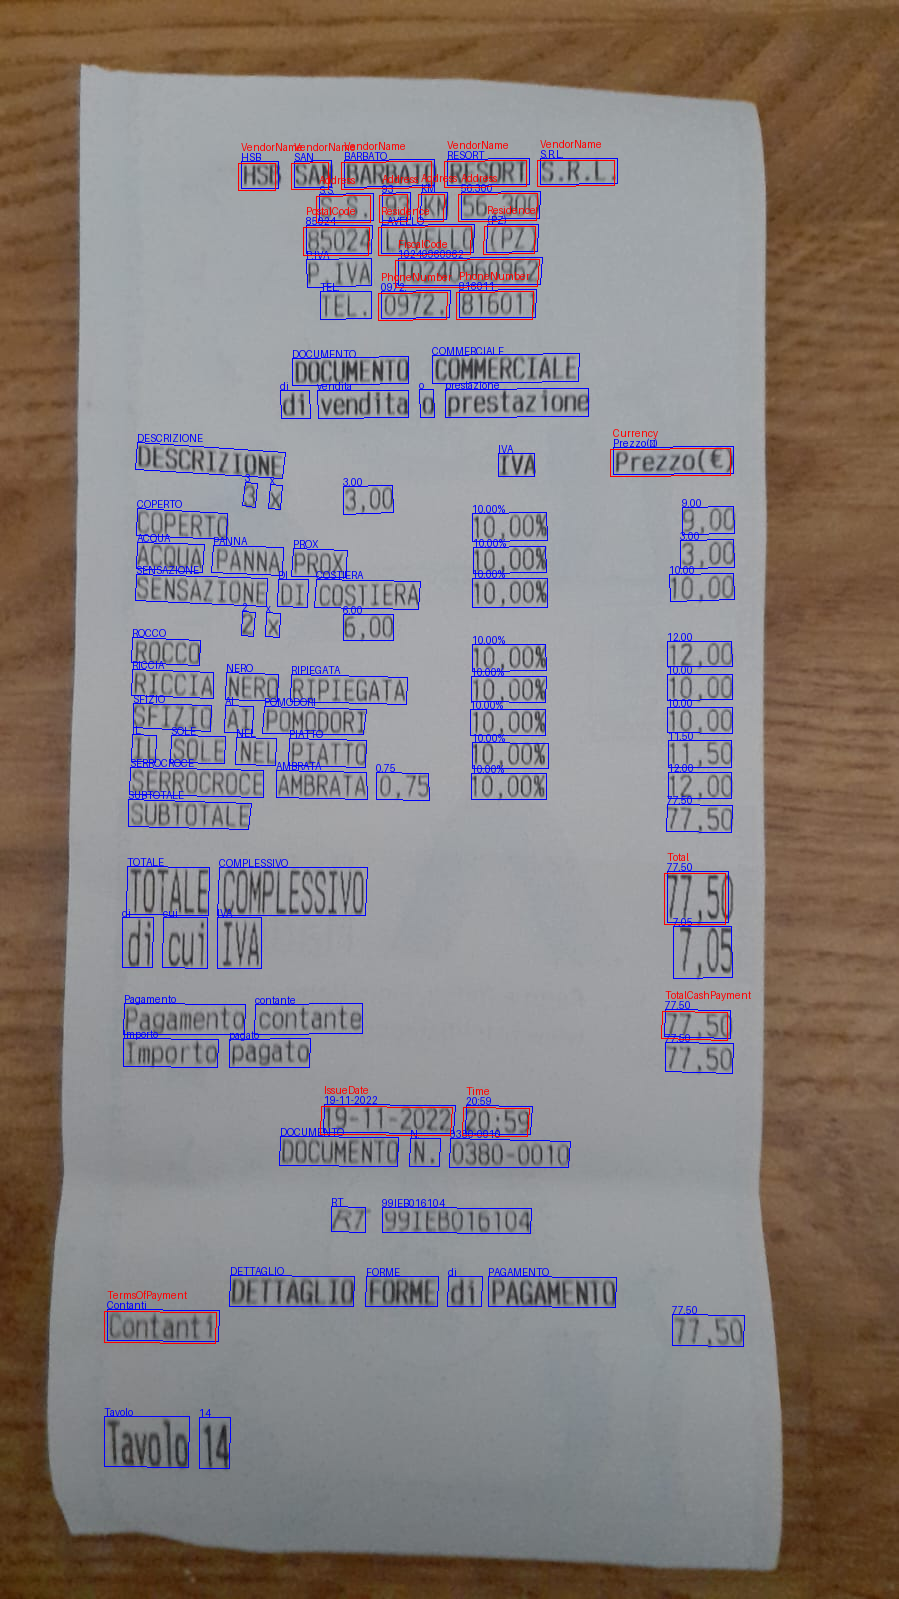

In [ ]:
import json
from PIL import Image, ImageDraw, ImageFont
from IPython.display import display

# Path file
json_path = '/content/drive/MyDrive/dataset/receipt_challenge_response.json'
image_path = '/content/drive/MyDrive/dataset/receipt_challenge_image.jpg'

# Carica immagine originale e crea una copia
image = Image.open(image_path).convert("RGBA")
image_copy = image.copy()
draw = ImageDraw.Draw(image_copy)

# Carica i dati dal file JSON
with open(json_path, 'r') as f:
    data = json.load(f)

# Estrai la prima pagina
pages = data.get('Pages', [])
if not pages:
    raise ValueError("Nessuna pagina trovata nel JSON.")

first_page = pages[0]
ocr_data = first_page.get('Ocr', [])
entities_data = first_page.get('Entities', {})

# Colori e offset
ocr_color = (0, 0, 255)         # Blu per OCR
entity_color = (255, 0, 0)      # Rosso per Entità
entity_offset = 5               # Sposta leggermente verso il basso i box entità
label_offset = 20               # Etichetta sopra il box
expand_px = 3                   # Espansione dei box entità

# Font
try:
    font = ImageFont.truetype("arial.ttf", 12)
except IOError:
    font = ImageFont.load_default()

# Disegna i box OCR (in blu)
for ocr in ocr_data:
    text = ocr.get('Text', '')
    box = ocr.get('BoundingBox', [])

    if len(box) == 4:
        coords = [(x, y) for x, y in box]
        draw.polygon(coords, outline=ocr_color)
        draw.text((coords[0][0], coords[0][1] - 10), text, fill=ocr_color, font=font)

# Disegna box delle entità in rosso, sfalsati e espansi
for entity_name, entity_info in entities_data.items():
    text = entity_info.get('Text', entity_name)  # Usa il nome dell'entità come testo
    box_list = entity_info.get('BoundingBox', [])

    for box in box_list:
        if len(box) == 4:
            # Espandi e sfalsa ogni punto del box
            box_coords = []
            for x, y in box:
                x_exp = max(0, min(image_copy.width, x - expand_px))
                y_exp = max(0, min(image_copy.height, y + entity_offset - expand_px))
                box_coords.append((x_exp, y_exp))

            draw.polygon(box_coords, outline=entity_color)

            # Scrivi il nome dell'entità sopra il box
            draw.text((box[0][0], box[0][1] - label_offset), entity_name, fill=entity_color, font=font)

# Mostra l'immagine nitidamente
display(image_copy)

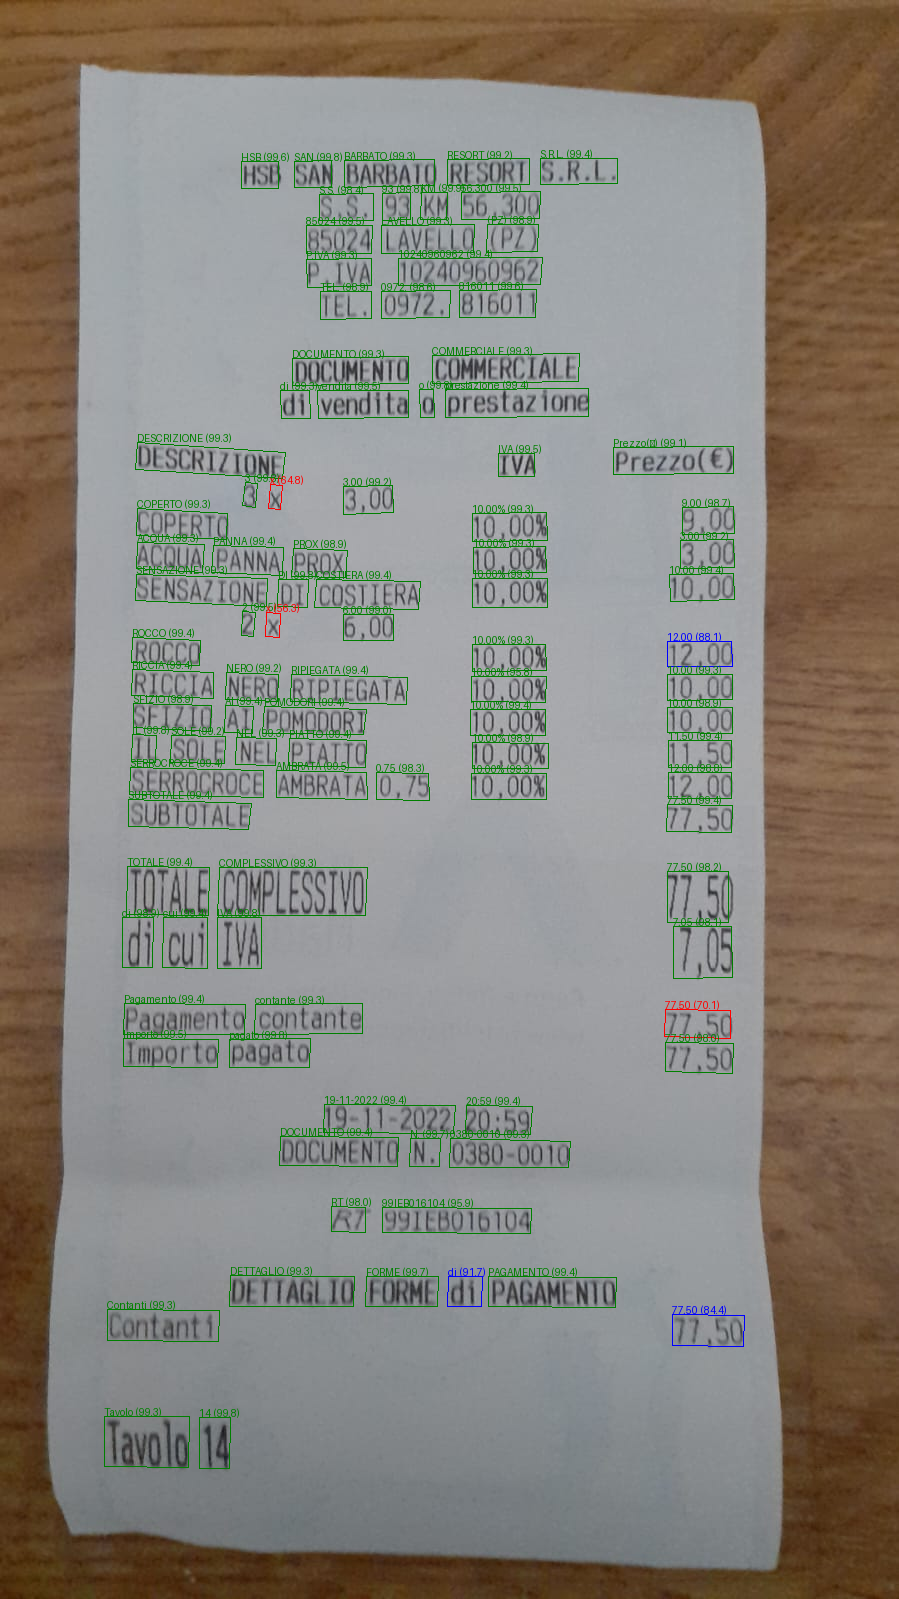

Immagine OCR salvata in: /content/drive/MyDrive/dataset/output_red_blue_boxes_labels.png


In [ ]:
import json
from PIL import Image, ImageDraw
from IPython.display import display, Image as IPImage

# Path
json_path = '/content/drive/MyDrive/dataset/receipt_challenge_response.json'
image_path = '/content/drive/MyDrive/dataset/receipt_challenge_image.jpg'

# Caricamento dati
with open(json_path, 'r') as f:
    data = json.load(f)

image = Image.open(image_path).convert("RGB")
draw = ImageDraw.Draw(image)
pages = data.get('Pages', [])
ocr_data = pages[0].get('Ocr', []) if pages else []

# Disegna OCR
for ocr in ocr_data:
    text = ocr.get('Text', '')
    conf = ocr.get('Confidence', 0)
    box = ocr.get('BoundingBox', [])

    if len(box) == 4:
        coords = [(x, y) for [x, y] in box]

        # Codifica visiva confidenza
        if conf >= 95:
            color = "green"  # Verde per alta confidenza
        elif conf >= 80:
            color = "blue"   # Blu per confidenza media
        else:
            color = "red"    # Rosso per bassa confidenza

        # Disegna bounding box
        draw.polygon(coords, outline=color)
        # Aggiungi testo sopra il bounding box
        draw.text((coords[0][0], coords[0][1] - 10), f"{text} ({conf:.1f})", fill=color)

# Salva immagine
image.save(output_path)

# Visualizza l'immagine direttamente nel notebook
display(IPImage(output_path))

# Conferma del salvataggio
print(f"Immagine OCR salvata in: {output_path}")